#Programming Assignment: Programming Assignment 5: Dynamic Programming 1

5-1: Money Change Again

In [ ]:
import math

money = int(input())
denominations = [1, 3, 4]
minCoins = [0] + [math.inf]*money

for i in range(1, money+1):
    for j in denominations:
        if i>=j:
            coins = minCoins[i-j]+1
            if coins < minCoins[i]:
                minCoins[i] = coins

print(minCoins[money])

5-2: Primitive Calculator

In [ ]:
import math

n = int(input())

# number of operations required for getting 0, 1, 2,.. , n
num_operations = [0, 0] + [math.inf]*(n-1)

for i in range(2, n+1):
    temp1, temp2, temp3 = [math.inf]*3

    temp1 = num_operations[i-1] + 1 
    if i%2 == 0: temp2 = num_operations[i//2] + 1
    if i%3 == 0: temp3 = num_operations[i//3] + 1
    min_ops = min(temp1, temp2, temp3)
    num_operations[i] = min_ops

print(num_operations[n])

# Backtracking the numbers leading to n
nums = [n]
while n!=1:
    if n%3 ==0 and num_operations[n]-1 == num_operations[n//3]:
        nums += [n//3]
        n = n//3
    elif n%2 ==0 and num_operations[n]-1 == num_operations[n//2]:
        nums += [n//2]
        n = n//2
    else:
        nums += [n-1]
        n = n - 1

print(' '.join([str(i) for i in nums][::-1]))

5-3: Edit Distance

In [ ]:
import numpy

def EditDistance(s1, s2):
    """ Computes the edit distance of two strings
    (str, str) -> (int, 2D-array) """
    ln_s1 = len(s1)
    ln_s2 = len(s2)

    # Initializing the matrix
    Matrix = numpy.zeros((ln_s1+1 , ln_s2+1))
    for i in range(ln_s2+1):
        Matrix[0][i] = i

    for i in range(ln_s1+1):
        Matrix[i][0] = i

    # Filling the matrix
    for i in range(1, ln_s1+1):
        for j in range(1, ln_s2+1):
            insertion = Matrix[i][j-1]   + 1
            deletion  = Matrix[i-1][j]   + 1
            mismatch  = Matrix[i-1][j-1] + 1
            match     = Matrix[i-1][j-1]
            if s1[i-1] == s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, match)
            if s1[i-1] != s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, mismatch)
    
    return (int(Matrix[ln_s1][ln_s2]), Matrix)

def OptimalAlignment(Matrix, s1, s2, top, bottom, i, j):
    """ Finds the optimal alignment of two strings given the edit matrix
    (2D-array, str, str, str, str, int, int) -> (str, str) """

    if i == 0 and j == 0:
        return (' '.join(top[::-1]), ' '.join(bottom[::-1]))

    if i>0 and Matrix[i][j] == Matrix[i-1][j] + 1:
        top.append(f'|{s1[i-1]}|')
        bottom.append('|-|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i-1, j)

    elif j>0 and Matrix[i][j] == Matrix[i][j-1] + 1:
        bottom.append(f'|{s2[j-1]}|')
        top.append('|-|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i, j-1)

    else:
        top.append(f'|{s1[i-1]}|')
        bottom.append(f'|{s2[j-1]}|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i-1, j-1)

if __name__ == '__main__':
    s1, s2 = input(), input()
    edit_distance, Matrix = EditDistance(s1, s2)
    top, bottom = OptimalAlignment(Matrix, s1, s2, [], [], len(s1), len(s2))

    print(edit_distance)


5-4: Longest Common Subsequence of Two Sequence

In [ ]:
import numpy

def LCS2(s1, s2, n1, n2):
    Matrix = numpy.zeros((n1+1 , n2+1))
    for i in range(1, n1+1):
        for j in range(1, n2+1):
          if s1[i-1] == s2[j-1]:
              Matrix[i][j] = Matrix[i-1][j-1] + 1
          else:
              Matrix[i][j] = max(Matrix[i][j-1], Matrix[i-1][j])
    
    return (int(Matrix[n1][n2]), Matrix)
if __name__ == '__main__':
    n1, s1, n2, s2 = int(input()), input(), int(input()), input() 
    s1, s2 = [int(i) for i in s1.split()], [int(i) for i in s2.split()]
    LCS_length, Matrix = LCS2(s1, s2, n1, n2)
    print(LCS_length)


5-5: Longest Common Subsequence of Three Sequence

In [ ]:
import numpy
                                    
def LCS3(s1, s2, s3, n1, n2, n3):
    Matrix = numpy.zeros((n1+1 , n2+1, n3+1))

    for i in range(1, n1+1):
        for j in range(1, n2+1):
            for k in range(1, n3+1):
                if s1[i-1] == s2[j-1] == s3[k-1]:
                    Matrix[i][j][k] = Matrix[i-1][j-1][k-1] + 1
                else:
                    Matrix[i][j][k] = max(Matrix[i-1][j][k], Matrix[i][j-1][k], Matrix[i][j][k-1])
    
    return (int(Matrix[-1][-1][-1]), Matrix)

if __name__ == '__main__':
    n1, s1, n2, s2, n3, s3 = int(input()), input(), int(input()), input(), int(input()), input()
    s1, s2, s3 = [int(i) for i in s1.split()], [int(i) for i in s2.split()],  [int(i) for i in s3.split()]
    LCS_length, Matrix = LCS3(s1, s2, s3, n1, n2, n3)
    print(LCS_length)

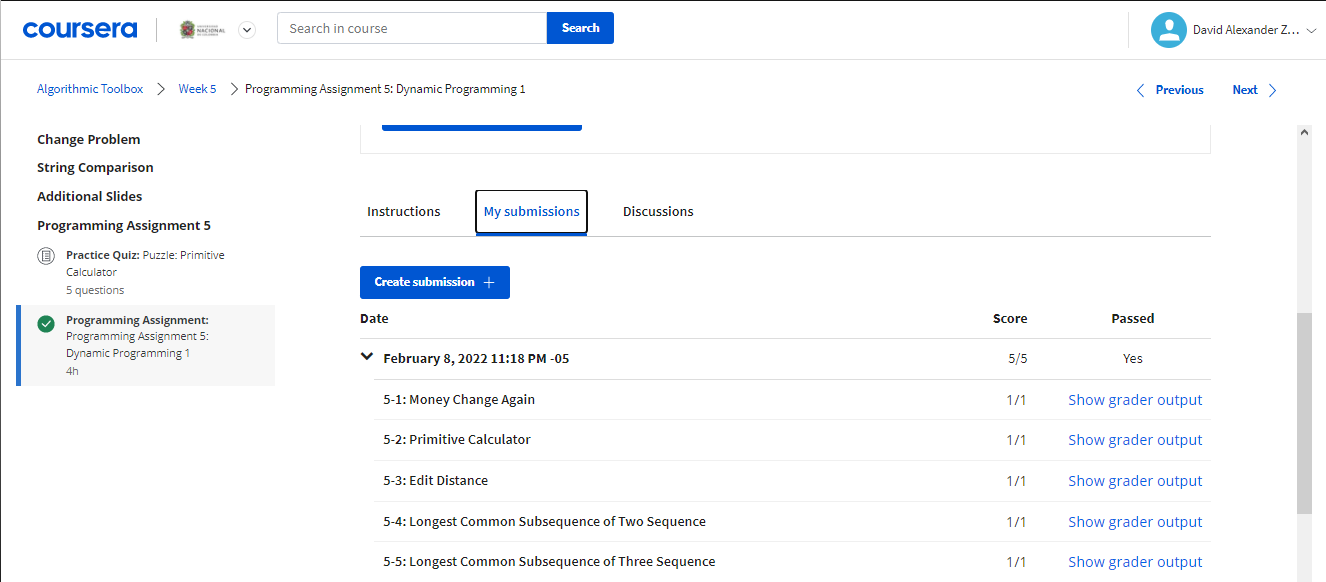

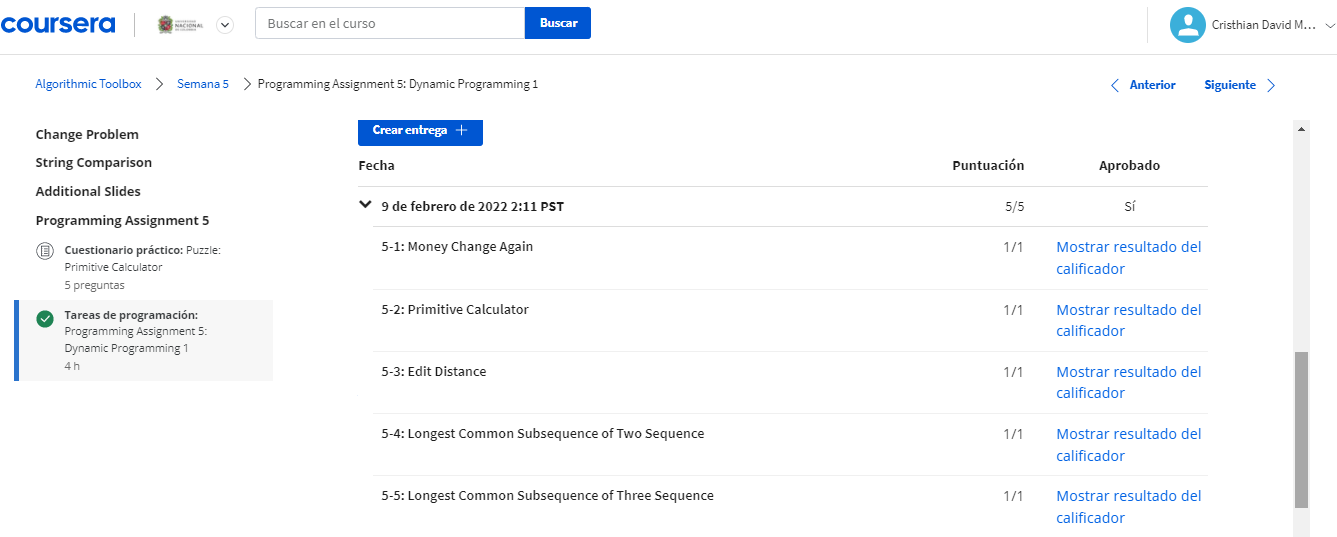

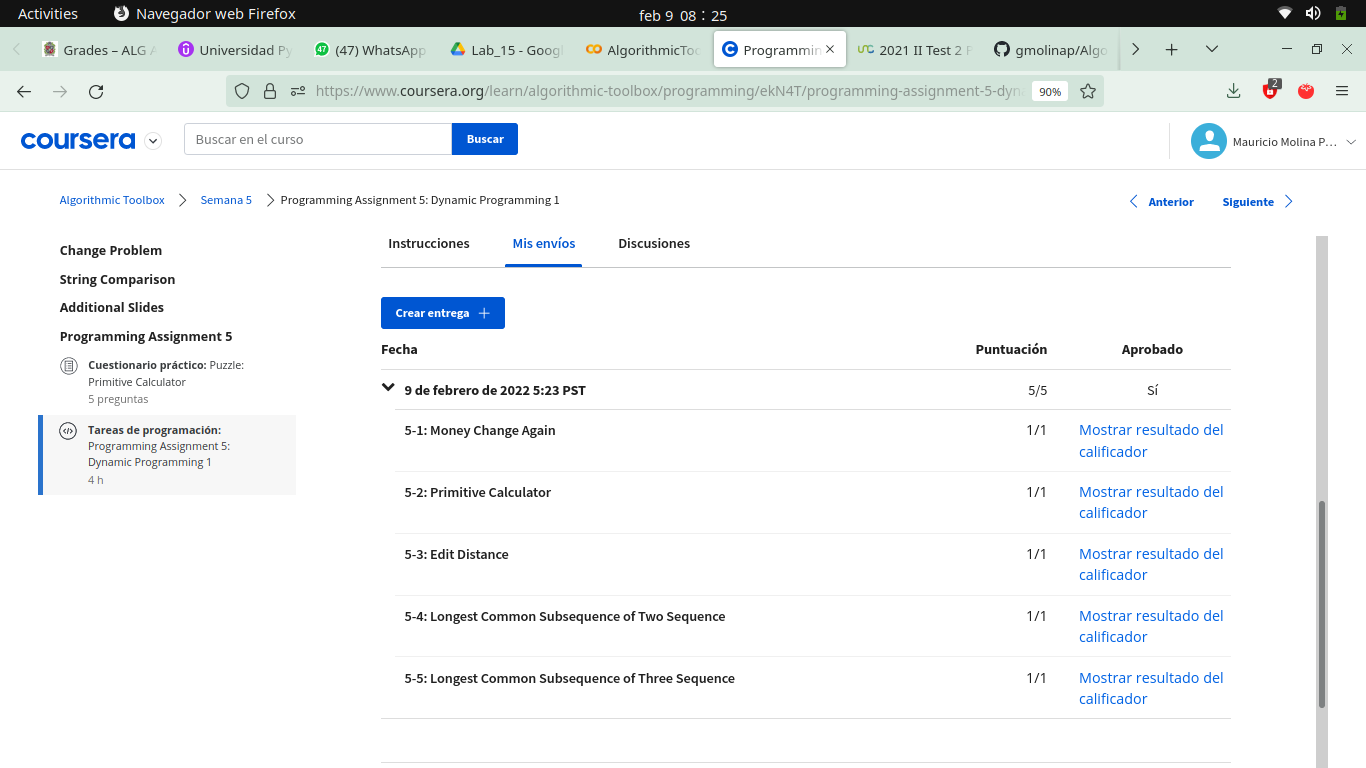